In [49]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

In [51]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [3]:
# normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

In [4]:
# load training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
trainloader

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


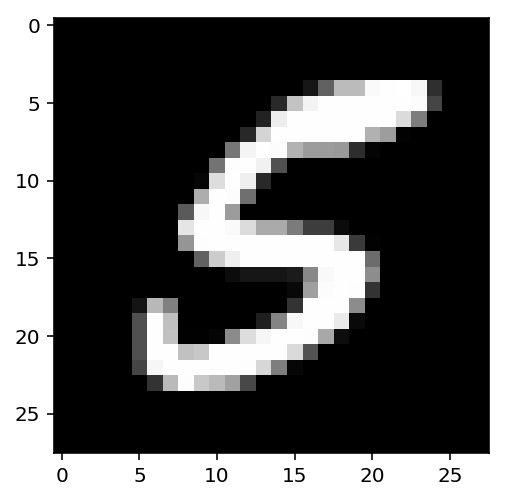

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [7]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [8]:
images.shape

torch.Size([64, 1, 28, 28])

In [9]:
# flatten the input images
inputs = images.view(images.shape[0], -1)
inputs.shape

torch.Size([64, 784])

In [10]:
# create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
out.shape

torch.Size([64, 10])

In [11]:
def softmax(x):
    return torch.exp(x)/ torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [12]:
probabilities = softmax(out)
probabilities.shape

torch.Size([64, 10])

In [19]:
probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

## Build functional networks with PyTorch

#### 1st Way

In [20]:
from torch import nn

In [21]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [25]:
# create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [ ]:
# Create the network and look at it's text representation
model = Network()
model

#### 2nd Way

In [26]:
import torch.nn.functional as F

In [27]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

#### 3rd Way

In [28]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        """ Forward pass through the network, returns the output logits """
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

In [29]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [35]:
print(model.fc1.weight.data)
print(model.fc1.bias.data)

tensor([[-0.0226,  0.0288, -0.0010,  ...,  0.0349, -0.0091,  0.0200],
        [ 0.0106, -0.0092,  0.0258,  ..., -0.0329,  0.0044, -0.0342],
        [-0.0153, -0.0237,  0.0278,  ..., -0.0057, -0.0194,  0.0176],
        ...,
        [-0.0313, -0.0116, -0.0104,  ..., -0.0276, -0.0078, -0.0350],
        [ 0.0245, -0.0351, -0.0239,  ..., -0.0234, -0.0345, -0.0124],
        [ 0.0159,  0.0062,  0.0185,  ..., -0.0224, -0.0050, -0.0341]])
tensor([-0.0356,  0.0296, -0.0199,  0.0068, -0.0018,  0.0138, -0.0172,  0.0245,
         0.0148, -0.0139, -0.0239, -0.0109, -0.0243, -0.0073,  0.0103, -0.0133,
         0.0083,  0.0190,  0.0044, -0.0274,  0.0141,  0.0190, -0.0344, -0.0101,
        -0.0150, -0.0232,  0.0283,  0.0109, -0.0297, -0.0027, -0.0103, -0.0212,
         0.0259, -0.0067,  0.0029, -0.0004, -0.0137, -0.0163, -0.0215,  0.0242,
         0.0265, -0.0056, -0.0183,  0.0135, -0.0189,  0.0352,  0.0087,  0.0209,
        -0.0280,  0.0245,  0.0212,  0.0330,  0.0113, -0.0352, -0.0189, -0.0310,
      

In [36]:
# set biases to all zeros for custom initialization
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [37]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0143,  0.0138,  0.0034,  ..., -0.0027, -0.0045,  0.0117],
        [-0.0015, -0.0042, -0.0152,  ..., -0.0006,  0.0004,  0.0081],
        [ 0.0004, -0.0073,  0.0003,  ...,  0.0043,  0.0114,  0.0182],
        ...,
        [-0.0061, -0.0154,  0.0061,  ...,  0.0021,  0.0081, -0.0015],
        [ 0.0086, -0.0026,  0.0154,  ..., -0.0039,  0.0037,  0.0002],
        [ 0.0166,  0.0069, -0.0027,  ...,  0.0040, -0.0076,  0.0097]])

## Forward Pass

In [38]:
# grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [39]:
images.shape

torch.Size([64, 1, 28, 28])

In [42]:
# resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(images.shape[0], 1, 784)

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        ...,

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]])

In [44]:
# forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx, :])
ps

tensor([[0.0923, 0.1148, 0.1024, 0.0890, 0.1021, 0.0985, 0.1049, 0.0918, 0.1064,
         0.0977]], grad_fn=<SoftmaxBackward>)

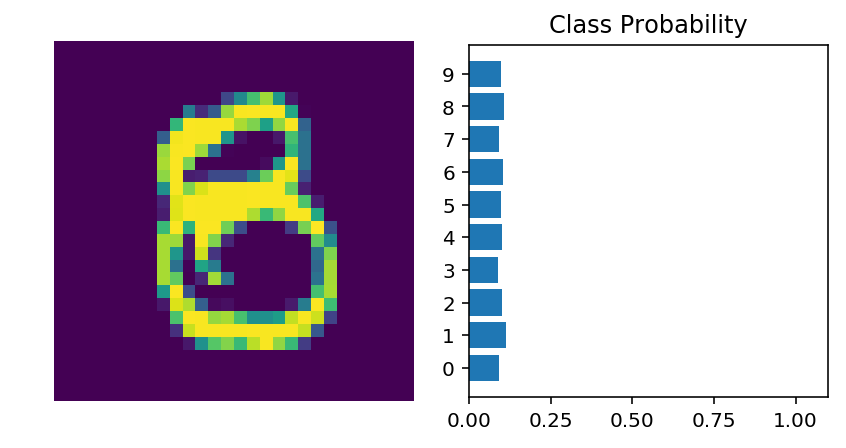

In [53]:
img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

## Building sequential networks

In [55]:
# hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


In [56]:
# forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

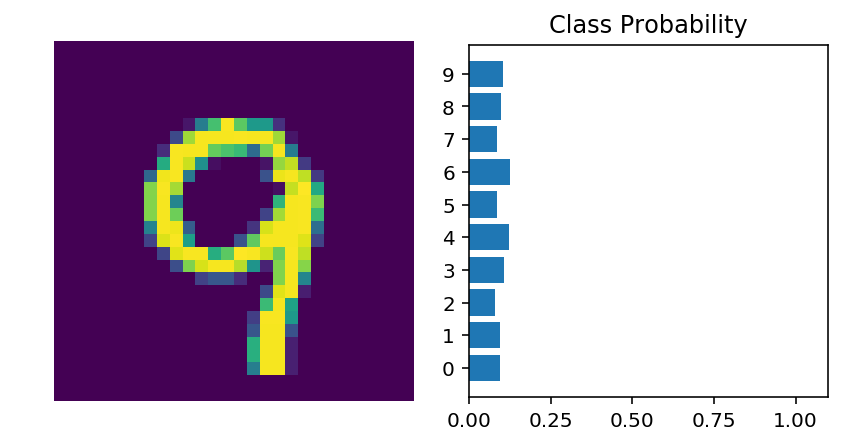

In [57]:
view_classify(images[0].view(1, 28, 28), ps)

In [59]:
print(model[0])
model[0].weight.data

Linear(in_features=784, out_features=128, bias=True)


tensor([[ 0.0111,  0.0239,  0.0084,  ...,  0.0018, -0.0079,  0.0268],
        [-0.0223,  0.0313,  0.0141,  ..., -0.0274,  0.0202, -0.0069],
        [-0.0005, -0.0004,  0.0039,  ..., -0.0065, -0.0213,  0.0126],
        ...,
        [-0.0062,  0.0219, -0.0291,  ..., -0.0063, -0.0179, -0.0337],
        [-0.0061,  0.0353, -0.0024,  ...,  0.0104, -0.0105,  0.0075],
        [ 0.0141, -0.0084, -0.0156,  ...,  0.0142, -0.0015, -0.0202]])

In [61]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [63]:
print(model[0])
model.fc1

Linear(in_features=784, out_features=128, bias=True)


Linear(in_features=784, out_features=128, bias=True)

<hr/>